# APIs and Python

## The Many Use Cases for APIs
APIs can actually be used for many things - not just for retrieving information. Twilio has an API that allows you to write a script to call their API to send text messages to people. GitHub has an API for creating new repositories. Many services have an API allowing a computer to automate a task that a person might otherwise have to do through a website - whether uploading a photo to Flickr, searching for a company name in a state database or getting a list of garbage collection times for a municipality.


## Limitations of APIs
When working with APIs, there are some limitations you have to be aware of - especially relating to scope and scale.
* **Scope** - Just because a company has an API and has information, it doesn't mean you can get all of the information through their API. Any time you want to get information from a given API, write a small test script and make sure it actually allows you to access the things you need in the way you require.
* **Scale** - Some APIs are provided for free as a public service. Others you have to pay for, or allow you to perform activities (like sending a text message) that you pay for. Whatever the commercial model, all APIs have some kind of rate limiting. Because it costs money to keep computers running and because you could write a script to ask lots and lots of questions of an API, generally an API will have some kind of limitations on the number of "API calls" you can make against the service per unit of time. Make sure that you know what the rate limits are and that your use case isn't going to need more API calls than you will be able to make.

Let's take a look at the requests library and it's uses.


In [1]:
import requests

### GET versus POST

In [2]:
#create a GET request from https://api.github.com/events and view it in json format

r = requests.get('https://api.github.com/events')
r.json()

[{'id': '9622992659',
  'type': 'PullRequestEvent',
  'actor': {'id': 8734072,
   'login': 'kerpecheva',
   'display_login': 'kerpecheva',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/kerpecheva',
   'avatar_url': 'https://avatars.githubusercontent.com/u/8734072?'},
  'repo': {'id': 23699350,
   'name': 'telerik/xamarin-forms-docs',
   'url': 'https://api.github.com/repos/telerik/xamarin-forms-docs'},
  'payload': {'action': 'opened',
   'number': 442,
   'pull_request': {'url': 'https://api.github.com/repos/telerik/xamarin-forms-docs/pulls/442',
    'id': 278701281,
    'node_id': 'MDExOlB1bGxSZXF1ZXN0Mjc4NzAxMjgx',
    'html_url': 'https://github.com/telerik/xamarin-forms-docs/pull/442',
    'diff_url': 'https://github.com/telerik/xamarin-forms-docs/pull/442.diff',
    'patch_url': 'https://github.com/telerik/xamarin-forms-docs/pull/442.patch',
    'issue_url': 'https://api.github.com/repos/telerik/xamarin-forms-docs/issues/442',
    'number': 442,
    'state': 'open

In [3]:
#create a post request from https://httpbin.org/post and view it in json format

r = requests.post('https://httpbin.org/post', data = {'key':'value'})
r.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'key': 'value'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Content-Length': '9',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.21.0'},
 'json': None,
 'origin': '63.98.217.210, 63.98.217.210',
 'url': 'https://httpbin.org/post'}

### Checking out the status of your request

#### Types of status codes
1xx - Informational responses

2xx - Success
- 200 OK
- 201 Created
- 204 No Content

3xx - Redirection

- 301 Moved Permanently (permanent URL redirection)
- 304 Not Modified (A conditional GET or HEAD request has been received and would have resulted in a 200 OK response if it were not for the fact that the condition evaluated to false.)

4xx - Client errors

- 400 Bad Request
- 401 Unauthorized
- 403 Forbidden
- 404 Not Found

5xx - Server errors

- 500 Internal Server Error


https://http.cat


In [4]:
r.status_code

200

In [21]:
r = requests.get('https://api.github.com/fake-ending')
r.status_code

404

### Other functionality 

Let's say you are looking at an API for a car rental company like Hertz, or maybe even Zipcar.

The following different requests will generate these different responses.

|Request        | Result        |
|-------------|-------------|
|GET /stores/   | User sees the list of stores|
|GET /rentals/  | User sees the history of car rentals|
|POST /rentals/ | User rents a car|
|PUT /rentals/{id}/| User changes destination store|
|DELETE /rentals/{id}/| User cancels the active car rental|



In [6]:
rental_json = [{
    "id": 1,
    "name": "John St",
    "location": [29, 95],
    "available_cars_quantity": 10
},
{
    "id": 2,
    "name": "Scott St.",
    "location": [29.5, 95.7],
    "available_cars_quantity": 2
}]

#### A note on errors and exceptions with the Requests library

There are a number of exceptions and error codes you need to be familiar with when using the Requests library in Python.

- The Requests library will raise a ConnectionError exception if there is a network problem like a DNS failure, or refused connection.
- These are rare, but with invalid HTTP responses, Requests will also raise an HTTPError exception. 
- A Timeout exception will be raised if a request times out.
- If and when a request exceeds the preconfigured number of maximum redirections, then a TooManyRedirects exception will be raised


If you don't know where the error is occuring the process, please use postman to verify your results. It is very helpful to further visualize what is happening with your request-response cycle.

Now that we know a bit more about APIs and how to interact with them in python, let's actually investigate an API from scratch. 

To start, go over to the API documentation at: 

https://dev.socrata.com/foundry/data.cityofnewyork.us/fhrw-4uyv


<img src="311_api_docs.png">

## Make an initial API call to retrieve 311 complaints from a neighborhood or zip code of your choice in New York City.

In [7]:
# Your code here
!pip install sodapy

In [22]:
# Formulation 1

token = 'qCyRgnDQXMQ4WRoQOmR6eMQi1' #This app token is posted to make teachers demonstration easier. 
#Please use sparingly. Overuse will lead to blacklisting and the token will be rendered useless.


#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", token)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("fhrw-4uyv", incident_zip = '10004', limit=1000)

In [23]:
# Formulation 2
import requests
import pandas as pd

zip_code = '10004'

# can't figure out date ranges at the moment...
start_date = '2018-01-01T12:00:00'
end_date = '2018-02-01T12:00:00'

# create pull request based on parameters
# https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9 click API

url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json?incident_zip={}".format(zip_code)

# do the pull
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
else:
    print('Hit an error.')

## Briefly Explore the Structure of the Response You Received.

In [24]:
#Formulation 1
type(results)

list

In [25]:
len(results)

1000

In [26]:
results[0]

{'address_type': 'PLACENAME',
 'agency': 'NYPD',
 'agency_name': 'New York City Police Department',
 'borough': 'MANHATTAN',
 'city': 'NEW YORK',
 'closed_date': '2019-05-11T14:44:10.000',
 'community_board': '01 MANHATTAN',
 'complaint_type': 'Panhandling',
 'created_date': '2019-05-11T14:21:35.000',
 'cross_street_1': 'PETER MINUIT PLACE',
 'cross_street_2': 'SOUTH STREET',
 'descriptor': 'N/A',
 'due_date': '2019-05-11T22:21:35.000',
 'facility_type': 'Precinct',
 'incident_zip': '10004',
 'landmark': 'SI FERRY TERMINAL',
 'latitude': '40.70096726219546',
 'location': {'type': 'Point',
  'coordinates': [-74.013134888845, 40.700967262195]},
 'location_type': 'Street/Sidewalk',
 'longitude': '-74.01313488884514',
 'open_data_channel_type': 'PHONE',
 'park_borough': 'MANHATTAN',
 'park_facility_name': 'Unspecified',
 'resolution_action_updated_date': '2019-05-11T14:44:10.000',
 'resolution_description': 'The Police Department responded and upon arrival those responsible for the conditi

In [27]:
# Formulation 2
print(type(data))

<class 'list'>


In [28]:
len(data)

1000

In [29]:
data[0]

{'address_type': 'PLACENAME',
 'agency': 'NYPD',
 'agency_name': 'New York City Police Department',
 'borough': 'MANHATTAN',
 'city': 'NEW YORK',
 'closed_date': '2019-05-11T14:44:10.000',
 'community_board': '01 MANHATTAN',
 'complaint_type': 'Panhandling',
 'created_date': '2019-05-11T14:21:35.000',
 'cross_street_1': 'PETER MINUIT PLACE',
 'cross_street_2': 'SOUTH STREET',
 'descriptor': 'N/A',
 'due_date': '2019-05-11T22:21:35.000',
 'facility_type': 'Precinct',
 'incident_zip': '10004',
 'landmark': 'SI FERRY TERMINAL',
 'latitude': '40.70096726219546',
 'location': {'type': 'Point',
  'coordinates': [-74.013134888845, 40.700967262195]},
 'location_type': 'Street/Sidewalk',
 'longitude': '-74.01313488884514',
 'open_data_channel_type': 'PHONE',
 'park_borough': 'MANHATTAN',
 'park_facility_name': 'Unspecified',
 'resolution_action_updated_date': '2019-05-11T14:44:10.000',
 'resolution_description': 'The Police Department responded and upon arrival those responsible for the conditi

## Create a Pandas DataFrame of the Data From the Response

In [30]:
# Formulation 1 
df_1 = pd.DataFrame(results)

print(len(df_1))
print(df_1.columns)
df_1.head()

1000
Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough',
       'bridge_highway_direction', 'bridge_highway_name',
       'bridge_highway_segment', 'city', 'closed_date', 'community_board',
       'complaint_type', 'created_date', 'cross_street_1', 'cross_street_2',
       'descriptor', 'due_date', 'facility_type', 'incident_address',
       'incident_zip', 'intersection_street_1', 'intersection_street_2',
       'landmark', 'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'park_borough', 'park_facility_name',
       'resolution_action_updated_date', 'resolution_description', 'road_ramp',
       'status', 'street_name', 'taxi_company_borough',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane'],
      dtype='object')


,address_type,agency,agency_name,bbl,borough,bridge_highway_direction,bridge_highway_name,bridge_highway_segment,city,closed_date,...,resolution_action_updated_date,resolution_description,road_ramp,status,street_name,taxi_company_borough,taxi_pick_up_location,unique_key,x_coordinate_state_plane,y_coordinate_state_plane
0,PLACENAME,NYPD,New York City Police Department,NaN,MANHATTAN,NaN,NaN,NaN,NEW YORK,2019-05-11T14:44:10.000,...,2019-05-11T14:44:10.000,The Police Department responded and upon arriv...,NaN,Closed,NaN,NaN,NaN,42649886,980608,194658
1,NaN,DPR,Department of Parks and Recreation,NaN,MANHATTAN,NaN,NaN,NaN,NEW YORK,NaN,...,NaN,The Department of Parks and Recreation usually...,NaN,Open,NaN,NaN,NaN,42649879,NaN,NaN
2,BLOCKFACE,DEP,Department of Environmental Protection,NaN,MANHATTAN,NaN,NaN,NaN,NEW YORK,NaN,...,NaN,NaN,NaN,Open,WATER STREET,NaN,NaN,42649485,981220,195439
3,ADDRESS,DEP,Department of Environmental Protection,1000290047,MANHATTAN,NaN,NaN,NaN,NEW YORK,NaN,...,NaN,NaN,NaN,Open,SOUTH WILLIAM STREET,NaN,NaN,42645611,981305,195971
4,ADDRESS,DCA,Department of Consumer Affairs,NaN,MANHATTAN,NaN,NaN,NaN,NEW YORK,NaN,...,NaN,The Department of Consumer Affairs (DCA) usual...,NaN,Open,WHITEHALL TERMINAL,NaN,NaN,42646047,980608,194658


In [31]:
# Formulation 2 
df_2 = pd.DataFrame(data)

print(len(df_2))
print(df_2.columns)
df_2.head()

1000
Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough',
       'bridge_highway_direction', 'bridge_highway_name',
       'bridge_highway_segment', 'city', 'closed_date', 'community_board',
       'complaint_type', 'created_date', 'cross_street_1', 'cross_street_2',
       'descriptor', 'due_date', 'facility_type', 'incident_address',
       'incident_zip', 'intersection_street_1', 'intersection_street_2',
       'landmark', 'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'park_borough', 'park_facility_name',
       'resolution_action_updated_date', 'resolution_description', 'road_ramp',
       'status', 'street_name', 'taxi_company_borough',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane'],
      dtype='object')


,address_type,agency,agency_name,bbl,borough,bridge_highway_direction,bridge_highway_name,bridge_highway_segment,city,closed_date,...,resolution_action_updated_date,resolution_description,road_ramp,status,street_name,taxi_company_borough,taxi_pick_up_location,unique_key,x_coordinate_state_plane,y_coordinate_state_plane
0,PLACENAME,NYPD,New York City Police Department,NaN,MANHATTAN,NaN,NaN,NaN,NEW YORK,2019-05-11T14:44:10.000,...,2019-05-11T14:44:10.000,The Police Department responded and upon arriv...,NaN,Closed,NaN,NaN,NaN,42649886,980608,194658
1,NaN,DPR,Department of Parks and Recreation,NaN,MANHATTAN,NaN,NaN,NaN,NEW YORK,NaN,...,NaN,The Department of Parks and Recreation usually...,NaN,Open,NaN,NaN,NaN,42649879,NaN,NaN
2,BLOCKFACE,DEP,Department of Environmental Protection,NaN,MANHATTAN,NaN,NaN,NaN,NEW YORK,NaN,...,NaN,NaN,NaN,Open,WATER STREET,NaN,NaN,42649485,981220,195439
3,ADDRESS,DEP,Department of Environmental Protection,1000290047,MANHATTAN,NaN,NaN,NaN,NEW YORK,NaN,...,NaN,NaN,NaN,Open,SOUTH WILLIAM STREET,NaN,NaN,42645611,981305,195971
4,ADDRESS,DCA,Department of Consumer Affairs,NaN,MANHATTAN,NaN,NaN,NaN,NEW YORK,NaN,...,NaN,The Department of Consumer Affairs (DCA) usual...,NaN,Open,WHITEHALL TERMINAL,NaN,NaN,42646047,980608,194658


## Create a Histogram of the Complaint Types From Your Dataset

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

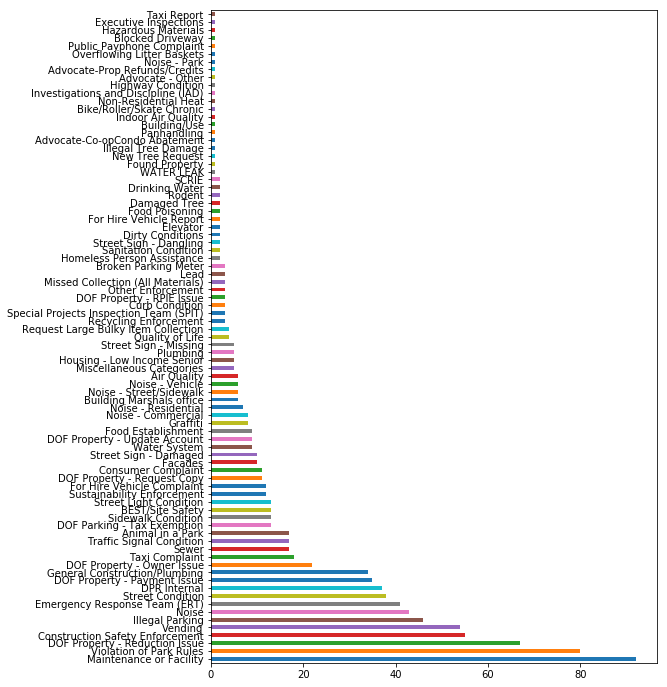

In [33]:
# Your code here 
df_1.complaint_type.value_counts().plot(kind='barh', figsize=(8,12))

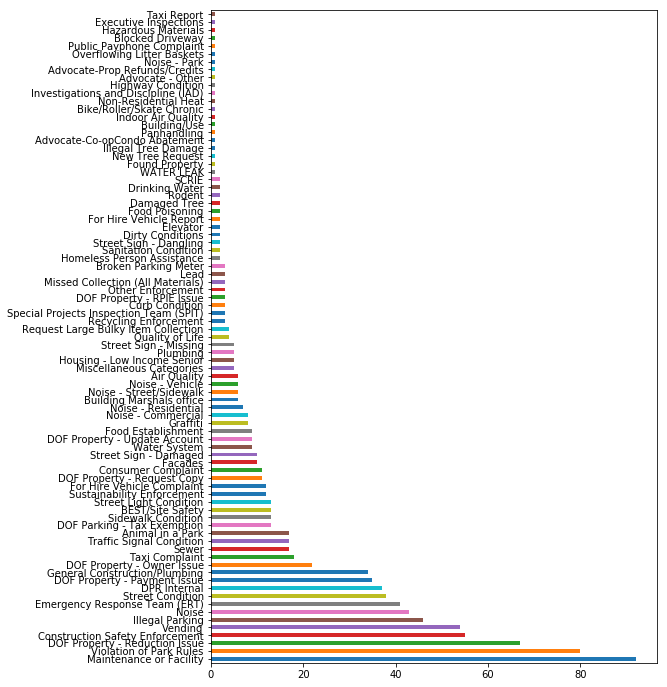

In [34]:
df_2.complaint_type.value_counts().plot(kind='barh', figsize=(8,12))